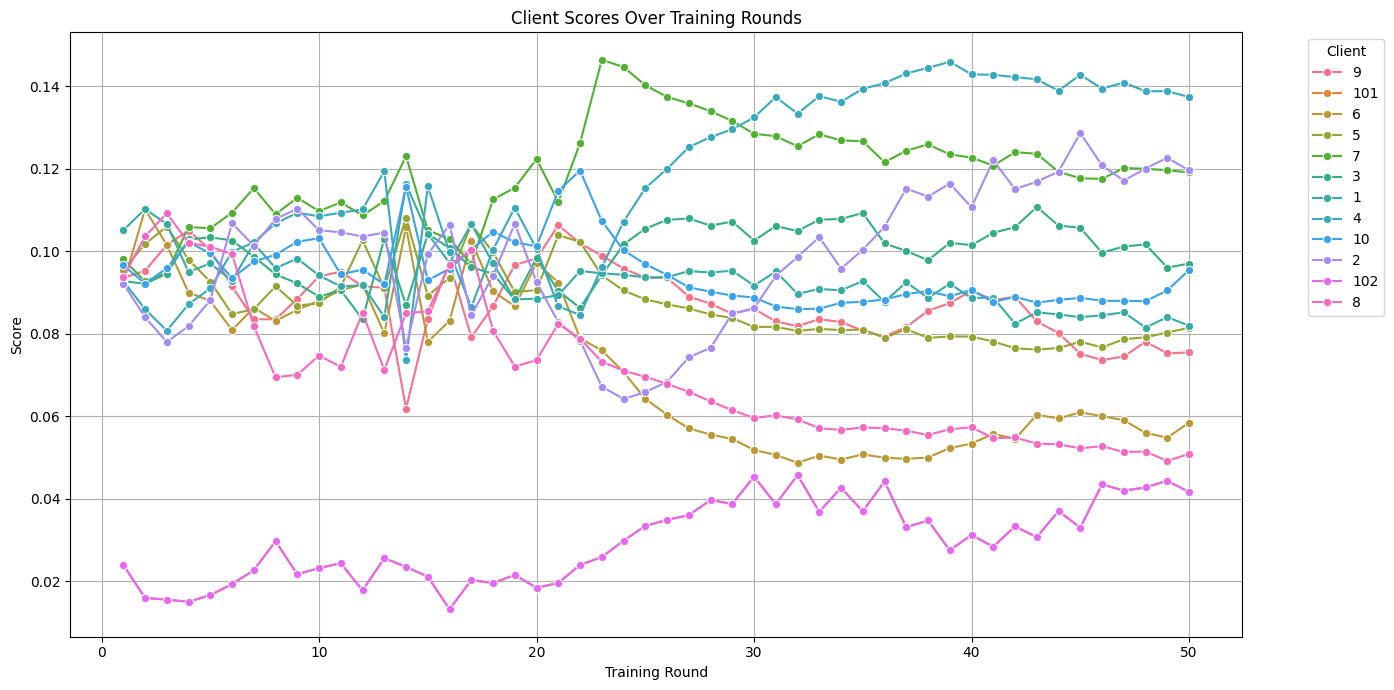

In [4]:
# plot 
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# save client memory
with open("client_memory_round.json", 'r') as f:
    data = json.load(f)

# Convert JSON data to a DataFrame
df = pd.DataFrame(data).T

# Reset index to have a column for 'Round'
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'Round'})

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Round', var_name='Client', value_name='Score')

# Convert the 'Round' column to numeric
df_melted['Round'] = pd.to_numeric(df_melted['Round'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Round', y='Score', hue='Client', marker='o')
plt.title('Client Scores Over Training Rounds')
plt.xlabel('Training Round')
plt.ylabel('Score')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot as a high-resolution image for scientific papers
plt.savefig('client_scores_plot_cifar10.png', dpi=300)
plt.show()

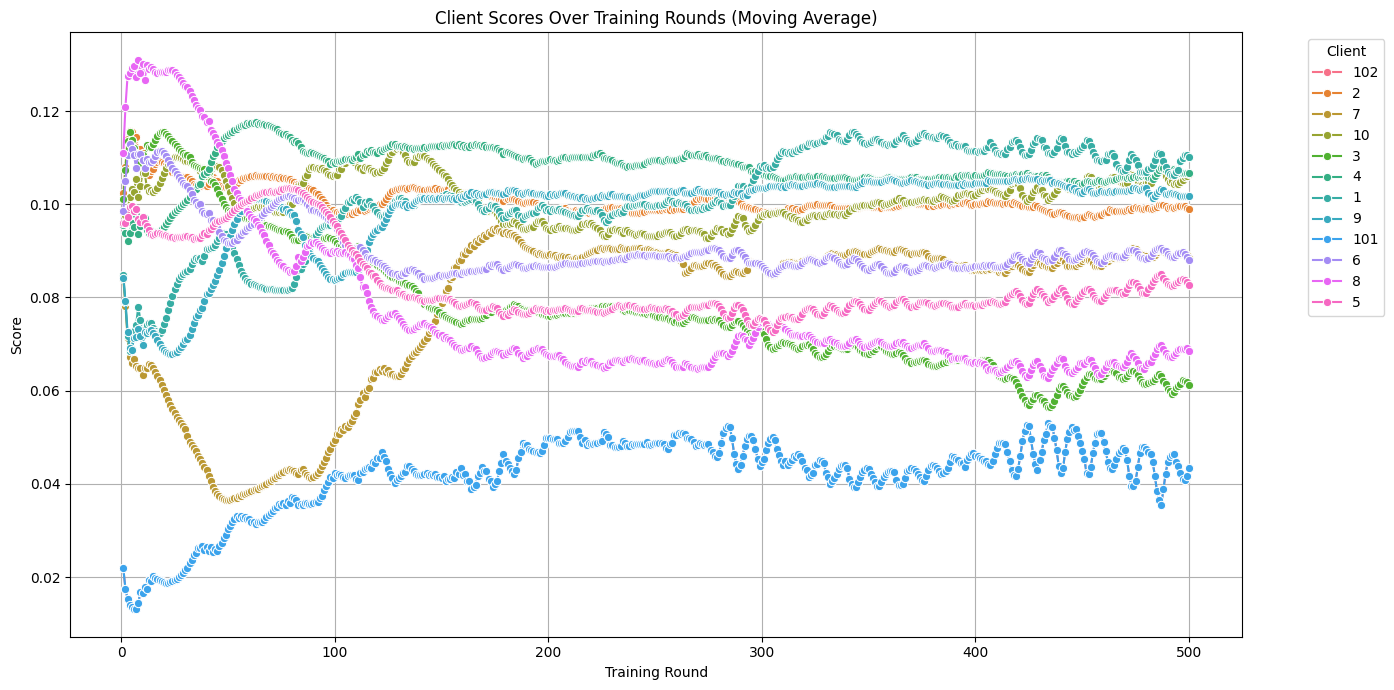

In [11]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# save client memory
with open("client_memory_round.json", 'r') as f:
    data = json.load(f)
    
# Function to calculate the moving average
def calculate_moving_average(data, window_size):
    df = pd.DataFrame(data).T
    df.fillna(0, inplace=True)
    moving_averages = df.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return moving_averages

# Parameters
window_size = 30  # Set your desired window size here

# Calculate moving averages
df_moving_avg = calculate_moving_average(data, window_size)

# Reset index to have a column for 'Round'
df_moving_avg.reset_index(inplace=True)
df_moving_avg = df_moving_avg.rename(columns={'index': 'Round'})

# Melt the DataFrame for seaborn
df_melted_moving_avg = df_moving_avg.melt(id_vars='Round', var_name='Client', value_name='Score')

# Convert the 'Round' column to numeric
df_melted_moving_avg['Round'] = pd.to_numeric(df_melted_moving_avg['Round'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted_moving_avg, x='Round', y='Score', hue='Client', marker='o')
plt.title('Client Scores Over Training Rounds (Moving Average)')
plt.xlabel('Training Round')
plt.ylabel('Score')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot as a high-resolution image for scientific papers
plt.savefig('client_scores_plot_moving_avg_.png', dpi=300)
plt.show()

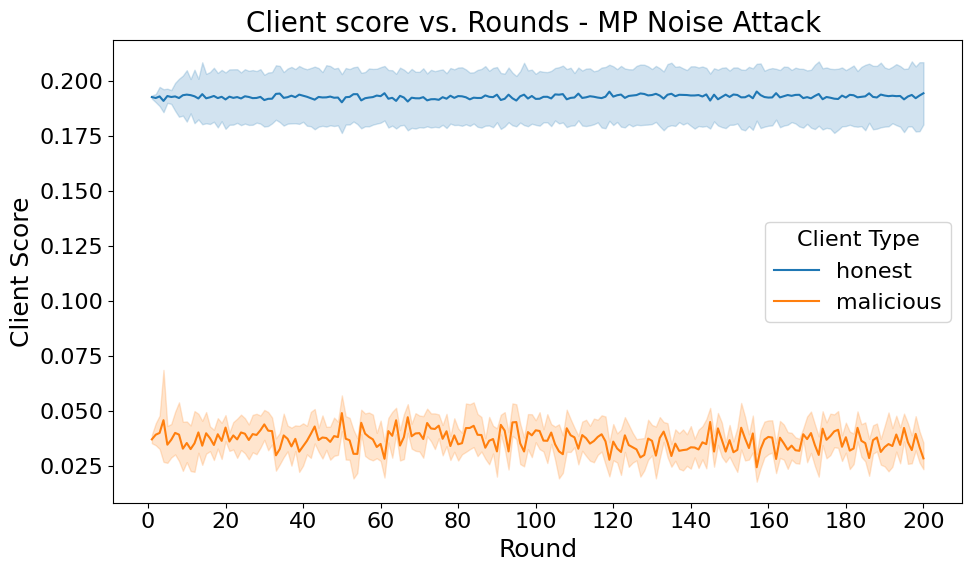

In [70]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_5clients_1att/MP_noise/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


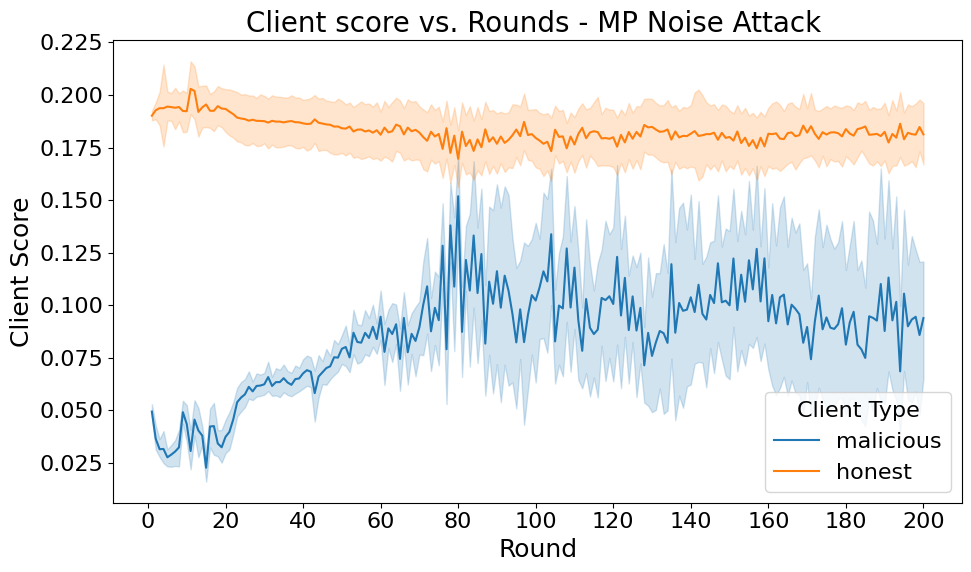

In [76]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_5clients_1att/MP_gradient_v2/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


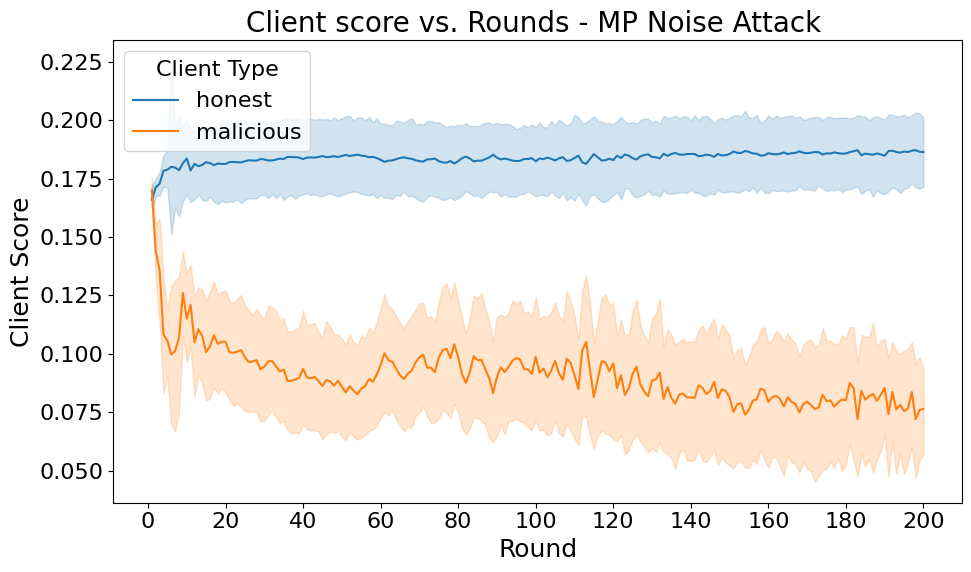

In [74]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_5clients_1att/DP_flip_v2/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


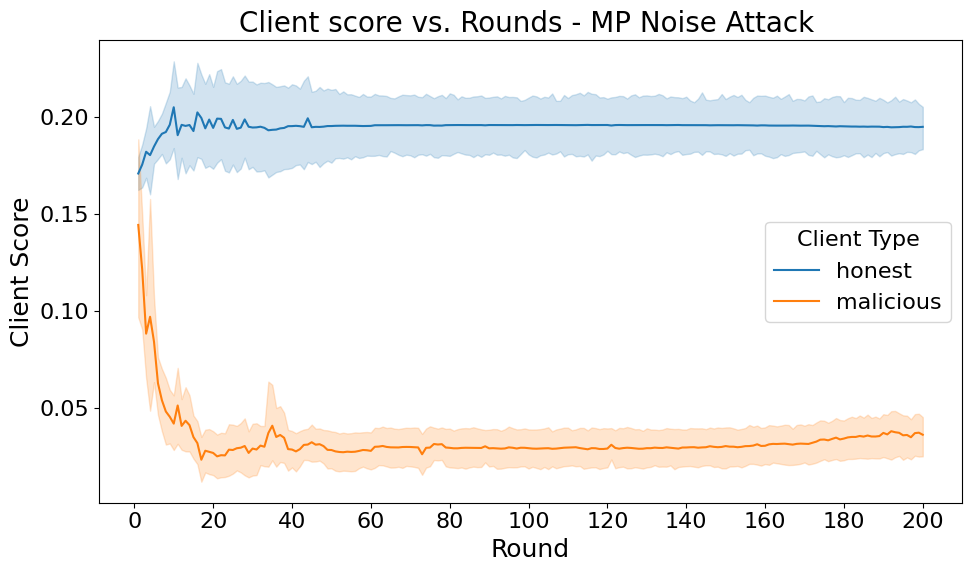

In [73]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_5clients_1att/DP_inv_loss/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


### 10 honest 2 att

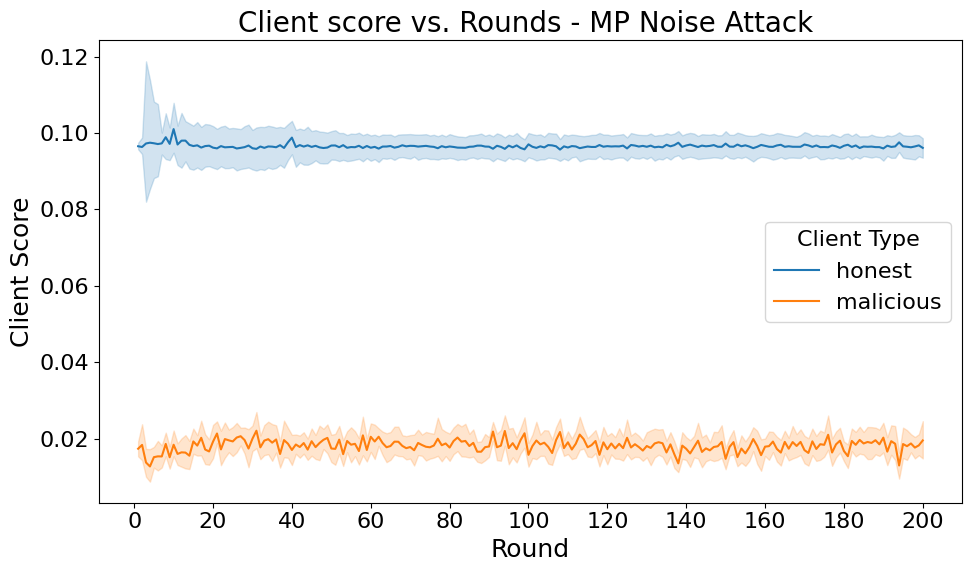

In [77]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_10clients_2att/MP_noise/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


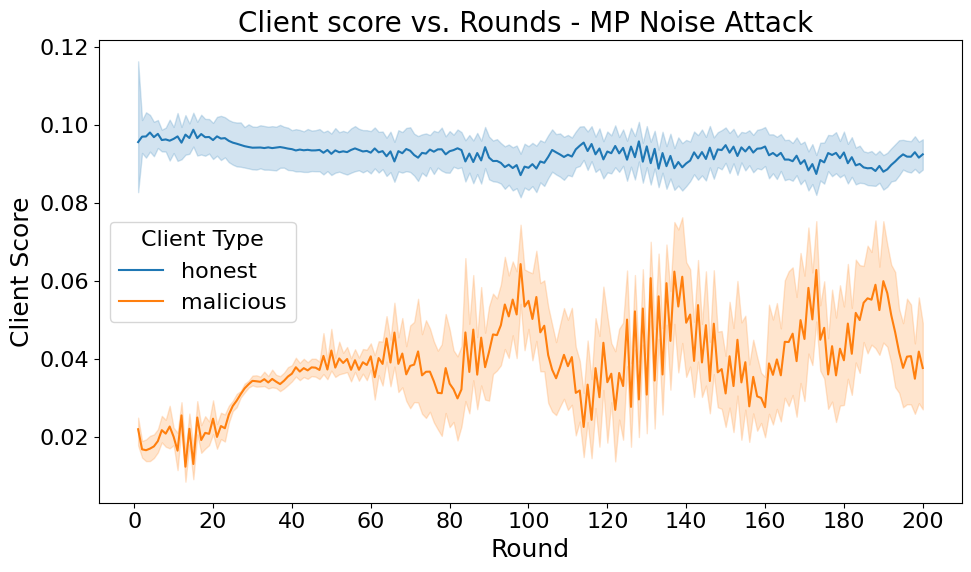

In [78]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_10clients_2att/MP_gradient/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


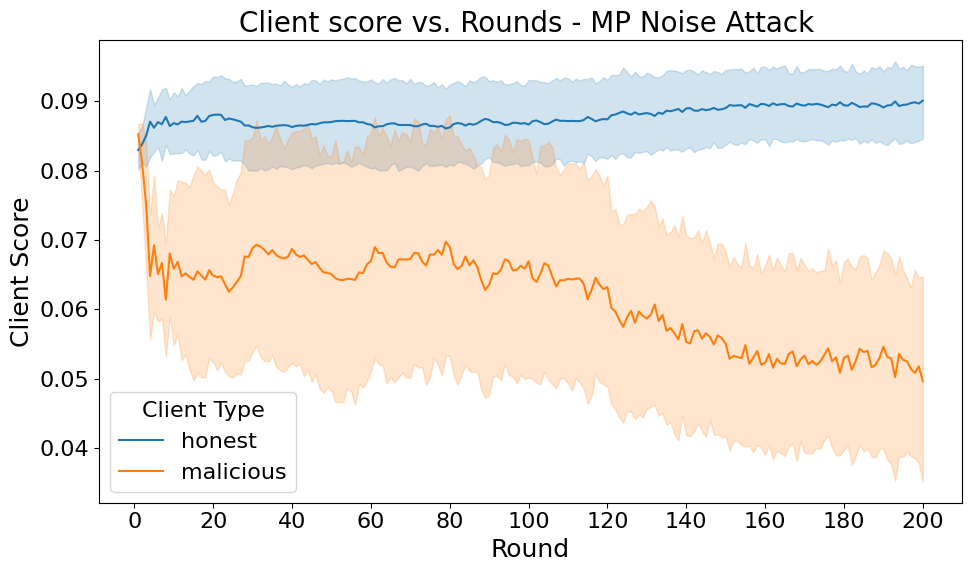

In [80]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10folds_10clients_2att/DP_flip/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score.pdf', dpi=400)
plt.show()


## new results with 10folds, 10 clients, 2 attackers and correct creation of the client datasets

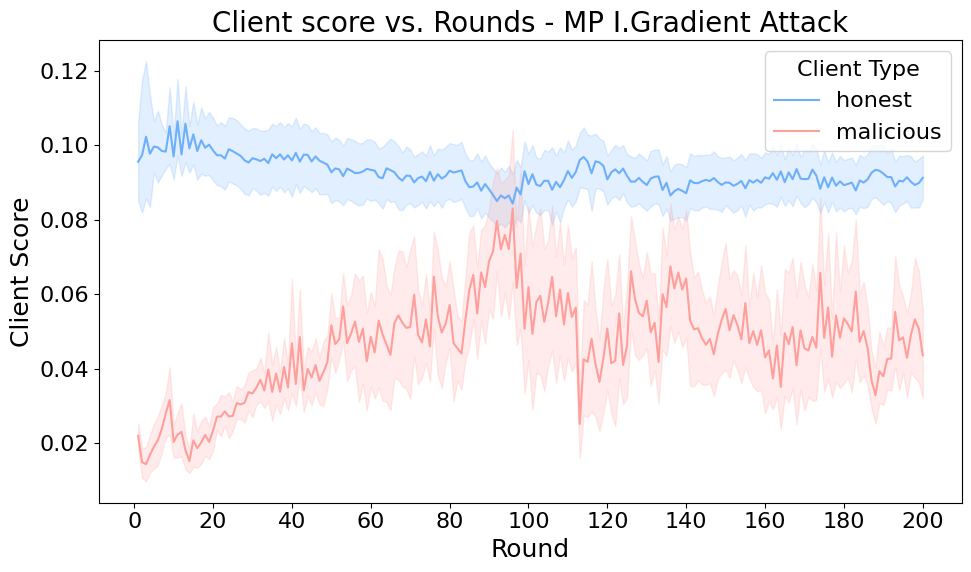

In [117]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
palette = sns.color_palette("pastel")


# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 9 folds
for i in range(1, 10):
    with open(f"score_trends/10_folds_10clients_2att/MP_gradient/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP I.Gradient Attack', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_MP_grad.pdf', dpi=400)
plt.show()

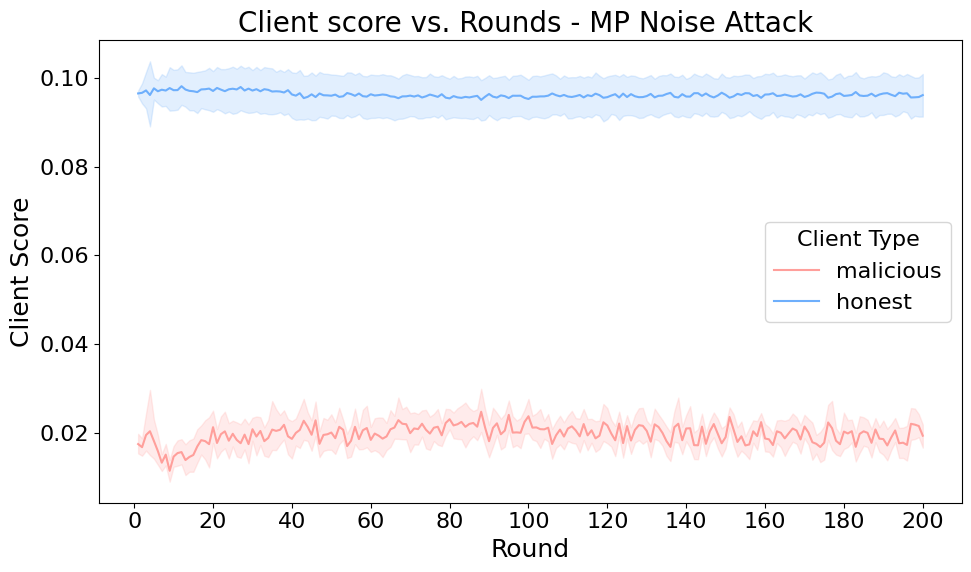

In [118]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10_folds_10clients_2att/MP_noise/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_MP_noise.pdf', dpi=400)
plt.show()


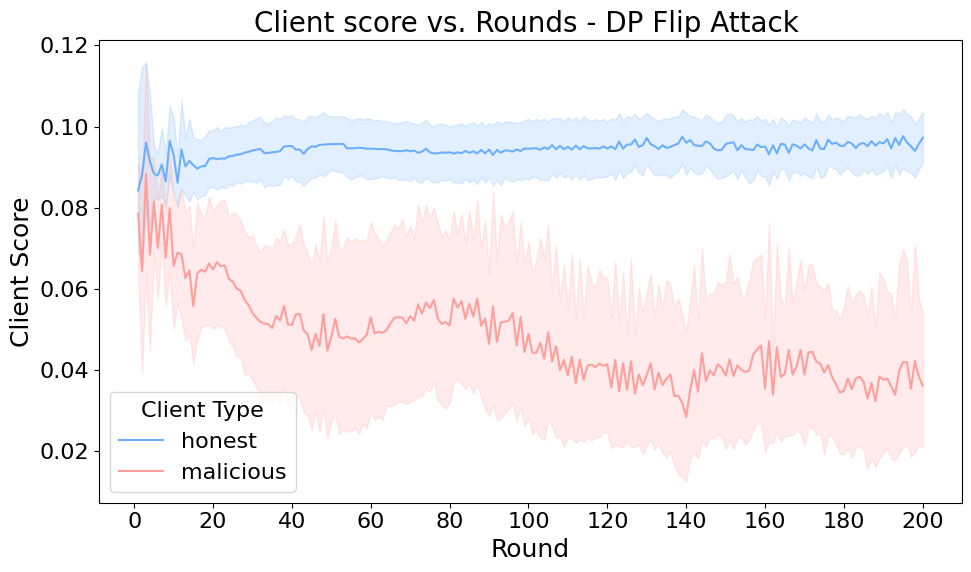

In [119]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10_folds_10clients_2att/DP_flip/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - DP Flip Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_DP_flip.pdf', dpi=400)
plt.show()


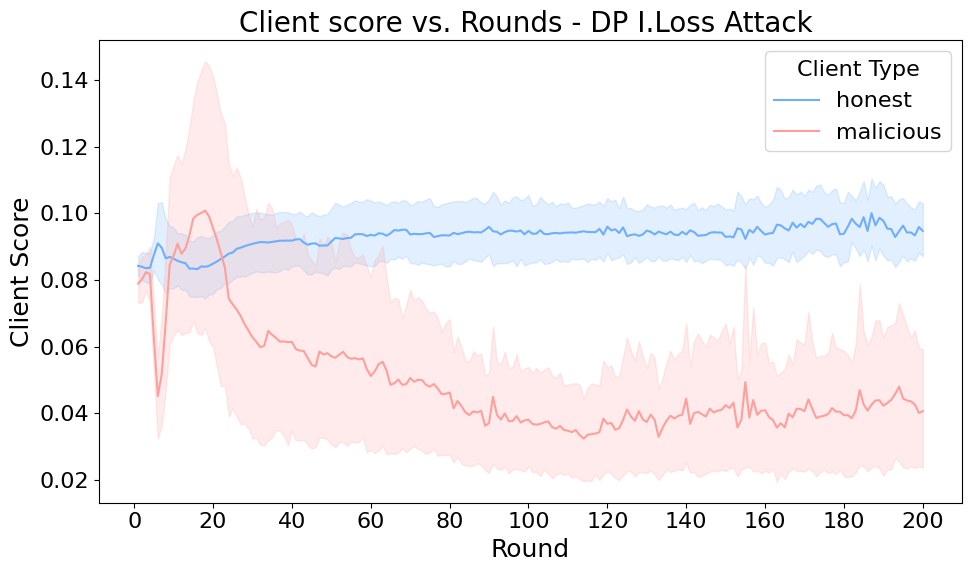

In [121]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 10):
    with open(f"score_trends/10_folds_10clients_2att/DP_inv_loss_v2/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - DP I.Loss Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_DP_inv_loss.pdf', dpi=400)
plt.show()


## 5 honest 1 att


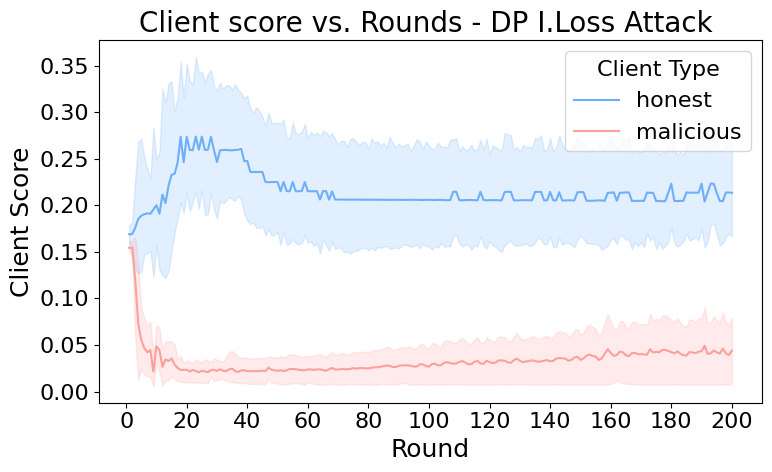

In [190]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 6):
    with open(f"score_trends/5_folds_5clients_1att/DP_inv_loss/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - DP I.Loss Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_DP_inv_loss.pdf', dpi=400)
plt.show()


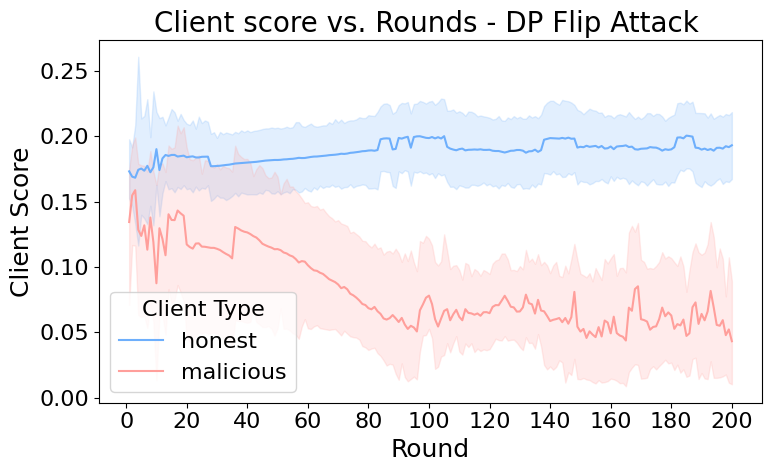

In [189]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 6):
    with open(f"score_trends/5_folds_5clients_1att/DP_flip/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - DP Flip Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_DP_flip.pdf', dpi=400)
plt.show()


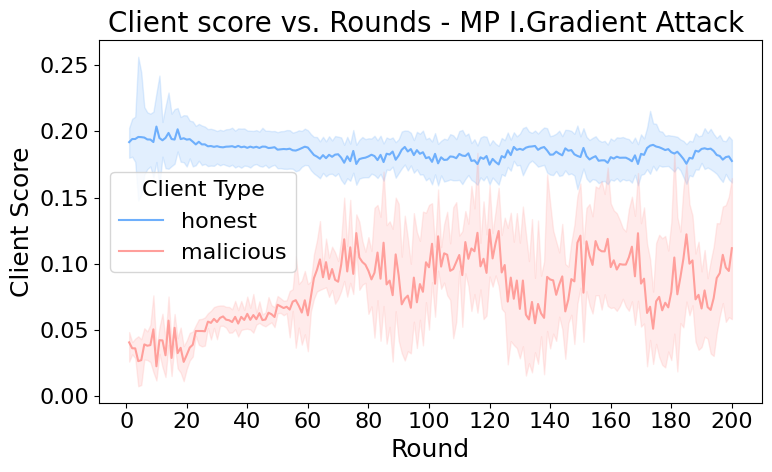

In [188]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 6):
    with open(f"score_trends/5_folds_5clients_1att/MP_gradient_v2/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP I.Gradient Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_MP_gradient_v2.pdf', dpi=400)
plt.show()


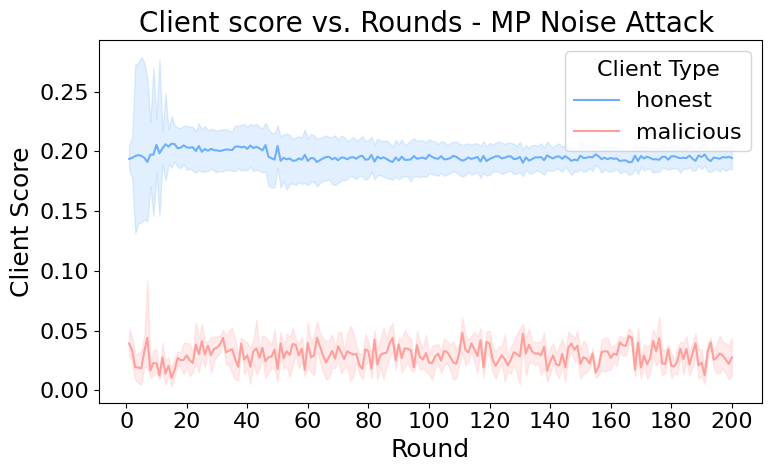

In [187]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 6):
    with open(f"score_trends/5_folds_5clients_1att/MP_noise/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'honest': (0.4313725490196078, 0.688235294117647, 0.99), 'malicious': palette[3]})
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type')
plt.title('Client score vs. Rounds - MP Noise Attack ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_MP_noise.pdf', dpi=400)
plt.show()


1
2
3
4
5


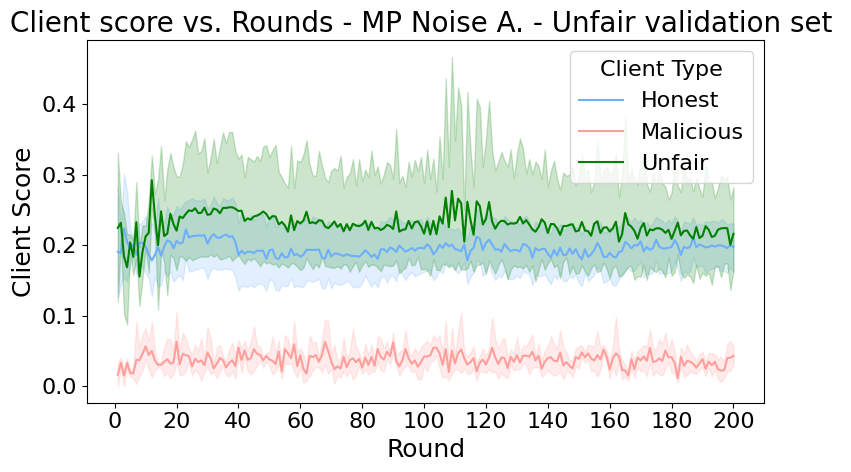

In [186]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 16})

# Initialize a list to hold data from all folds
combined_data = {}
client_unfair = {"1":[], "2":[], "3":[], "4":[], "5":[]}

# Read and combine data from all 5 folds
for i in range(1, 6):
    print(i)
    with open(f"score_trends/unfair_validation_set/MP_gradient_v2/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                if int(client_key) == 5:
                    client_unfair[str(i)].append(value)
                else:
                    new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                    new_client_key = str(new_client_key)
                    combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T


df_unfair = pd.DataFrame(client_unfair)
df_unfair['round'] = range(1, 201)
df_unfair = df_unfair.melt(id_vars=['round'], value_vars=["1", "2", "3", "4", "5"], var_name='variable', value_name='value')
df_unfair = df_unfair[['value', 'round']]
df_unfair['type'] = 'Unfair'

#average client unfair across all folds
mean_unfair = np.zeros((5, 200))
for i in range(1, 6):
    mean_unfair[i-1] = client_unfair[str(i)]

mean_unfair = np.mean(mean_unfair, axis=0)

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'Malicious' if int(x) >= 101 else 'Honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95), palette={'Honest': (0.4313725490196078, 0.688235294117647, 0.99), 'Malicious': palette[3]})
sns.lineplot(data=df_unfair, x='round', y='value', hue='type', errorbar=('ci', 90), palette={'Unfair': "green"})
# sns.lineplot(mean_unfair, color='green', label='Unfair Client')
plt.xlabel('Round', fontsize=18)
plt.ylabel('Client Score', fontsize=18)
plt.legend(title='Client Type', loc='upper right')
plt.title('Client score vs. Rounds - MP Noise A. - Unfair validation set ', fontsize=20)

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))
plt.tight_layout()
plt.savefig('MP_Noise_Client_Score_MP_noise_unfair.pdf', dpi=400)
plt.show()

In [2]:
import numpy as np
x = np.load('/Users/dariofenoglio/Library/CloudStorage/OneDrive-USI/PC/Desktop/USI_Locale/CounterFactual_FL/results/net/cifar10/2cluster/1/errors_1.npy')
x

array([[0.48133394, 0.0941812 ],
       [0.4837079 , 0.09340537],
       [0.4994334 , 0.11949564],
       [0.48034087, 0.09202634],
       [0.47542647, 0.08077163],
       [0.45951876, 0.07141672]], dtype=float32)